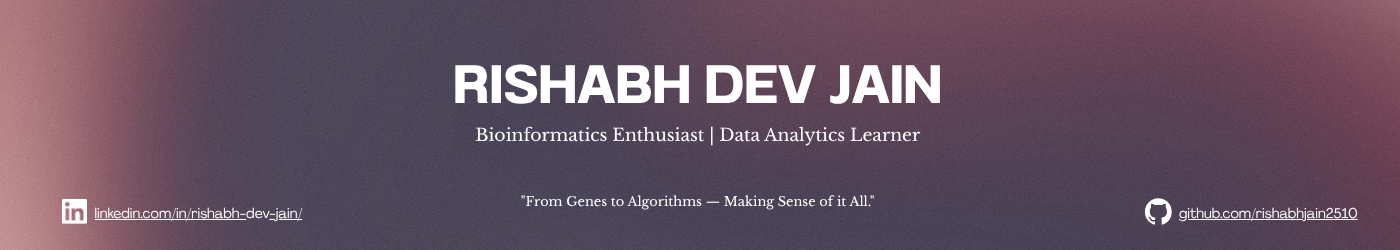

<div style="background-color:#494156; padding:15px; border-radius:8px;">
<h2 style="text-align:center; font-family: 'Helvetica Neue', sans-serif; font-weight:bold; font-size: 32px;">
TASK - SCRAPING GILSON WEBSITE
</h2>


</div>


<div style="background-color:#494156; padding:15px; border-radius:8px;">
<h2 style="text-align:center; font-family: 'Helvetica Neue', sans-serif; font-weight:bold;">
Step by Step Explanation
</h2>

- [Importing Libraries](#Importing-Libraries)
- [Adding Headers](#Adding-Headers)
- [Requesting URL](#Requesting-URL)
- [Getting Response](#Getting-Response)
- [Accessing the Code](#Accessing-the-Code)
- [Prettify the Code](#Prettify-the-Code)
- [Finding All Division Class That Contains the Details](#Finding-All-Division-Class-That-Contains-the-Details)
- [Finding The Number of Division Class](#Finding-The-Number-of-Division-Class)
- [Printing Those Division Class](#Printing-Those-Division-Class)
- [Creating Empty List](#Creating-Empty-List)
- [Accessing Required Information](#Accessing-Required-Information)
- [Converting Into DataFrame](#Converting-Into-DataFrame)
- [Removing Irrelevant values](#Removing-Irrelevant-values)
- [Saving to CSV File](#Saving-to-CSV-File)
  
  
</div>

## Importing Libraries

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

---
## Adding Headers

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
 }

#### Why You Need a Header?
Adding a header is a simple way to pretend your script is a regular browser, which helps you avoid being blocked.

---
## Requesting URL

In [3]:
url = 'https://www.gilson.com/default/shop-products/pipettes.html?srsltid=AfmBOoqOV3Sdidb7prT6f91fn9c_JRv_uo8cpJNV_r-EaKW_5kikp4hx'
response = requests.get(url)

---
## Getting Response

In [4]:
if response.status_code == 200:
    print("Successfully fetched the page!")
else:
    print(f"Failed to retrieve the page. Status code:{response.status_code}")

Successfully fetched the page!


---
## Accessing the Code

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<script>
    var LOCALE = 'en\u002DUS';
    var BASE_URL = 'https\u003A\u002F\u002Fwww.gilson.com\u002Fdefault\u002F';
    var require = {
        'baseUrl': 'https\u003A\u002F\u002Fwww.gilson.com\u002Fstatic\u002Fversion1754468410\u002Ffrontend\u002FGilson\u002Fcustomthemechild\u002Fen_US'
    };</script> <meta charset="utf-8"/>
<meta content="Gilson | Pipettes" name="title"/>
<meta content="Gilson pipettes combine great accuracy, precision and durability. The PIPETMAN pipette range has been trusted for over 40 years to deliver consistent results. View the full range here." name="description"/>
<meta content="Pipette, Pipette Tips, Pipetman, Pipette Calibration, Pipette Service, Mechanical Pipette, Electronic Pipette, Pipette Parts, Single Channel Pipette, Multichannel Pipette" name="keywords"/>
<meta content="INDEX,FOLLOW" name="robots"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="telephone=no" name="f

---
## Prettify the Code

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <script>
   var LOCALE = 'en\u002DUS';
    var BASE_URL = 'https\u003A\u002F\u002Fwww.gilson.com\u002Fdefault\u002F';
    var require = {
        'baseUrl': 'https\u003A\u002F\u002Fwww.gilson.com\u002Fstatic\u002Fversion1754468410\u002Ffrontend\u002FGilson\u002Fcustomthemechild\u002Fen_US'
    };
  </script>
  <meta charset="utf-8"/>
  <meta content="Gilson | Pipettes" name="title"/>
  <meta content="Gilson pipettes combine great accuracy, precision and durability. The PIPETMAN pipette range has been trusted for over 40 years to deliver consistent results. View the full range here." name="description"/>
  <meta content="Pipette, Pipette Tips, Pipetman, Pipette Calibration, Pipette Service, Mechanical Pipette, Electronic Pipette, Pipette Parts, Single Channel Pipette, Multichannel Pipette" name="keywords"/>
  <meta content="INDEX,FOLLOW" name="robots"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="tel

---
## Finding All Division Class That Contains the Details

In [8]:
pipette = soup.find_all('div', class_="product details product-item-details")

---
## Finding The Number of Division Class

In [9]:
print(len(pipette))

15


---
## Printing Those Division Class

In [11]:
pipette

[<div class="product details product-item-details">
 <div class="sku-box">F164001</div>
 <strong class="product name product-item-name">
 <a class="product-item-link" href="https://www.gilson.com/default/distriman-repetitive-pipette.html">
                                     DISTRIMAN Repetitive Pipette                                </a>
 </strong>
 <div class="price-box price-final_price" data-price-box="product-id-1551" data-product-id="1551" data-role="priceBox">
 <span class="price-container price-final_price tax weee">
 <span class="price-wrapper" data-price-amount="673" data-price-type="finalPrice" id="product-price-1551"><span class="price">$673.00</span></span>
 </span>
 <style>
 </style>
 </div><script>
     require([
         'jquery'
     ], function ($) {
         var products = $('.item.product.product-item');
 
         if (0) {
             products = products.add($('.cart.item .item-info'));
         }
 
         products.each(function () {
             var product   

---
## Creating Empty List

In [12]:
pipette_data=[]

### Accessing Required Information

In [13]:
for p in pipette:
    
    product_element = p.find('div', class_="sku-box")
    product = product_element.get_text(strip=True) if product_element else "N/A"

    title_element = p.find('a', class_="product-item-link")
    title = title_element.get_text(strip=True) if title_element else "N/A"

    price_element = p.find('span', class_="price")
    price = price_element.get_text(strip=True) if price_element else "N/A"

    pipette_data.append({
      "Product ID": product,
      "Product Name": title,
      "Price": price,
    })

In [14]:
print(pipette_data)

[{'Product ID': 'F164001', 'Product Name': 'DISTRIMAN Repetitive Pipette', 'Price': '$673.00'}, {'Product ID': 'F110120', 'Product Name': 'MACROMAN', 'Price': '$405.00'}, {'Product ID': 'FD10001', 'Product Name': 'MICROMAN E M10E, 1-10  µL', 'Price': '$527.00'}, {'Product ID': 'FD10002', 'Product Name': 'MICROMAN E M25E, 3-25  µL', 'Price': '$527.00'}, {'Product ID': 'FD10003', 'Product Name': 'MICROMAN E M50E, 20-50 µL', 'Price': '$527.00'}, {'Product ID': 'FD10004', 'Product Name': 'MICROMAN E M100E, 10-100 µL', 'Price': '$527.00'}, {'Product ID': 'FD10005', 'Product Name': 'MICROMAN E M250E, 50-250 µL', 'Price': '$527.00'}, {'Product ID': 'FD10006', 'Product Name': 'MICROMAN E M1000E, 100-1000 µL', 'Price': '$524.00'}, {'Product ID': 'F167350', 'Product Name': 'PIPETMAN L Starter Kit, P20L, P200L, P1000L', 'Price': '$1,306.00'}, {'Product ID': 'F167360', 'Product Name': 'PIPETMAN 4-Pipette Kit, P2, P20, P200, P1000', 'Price': '$1,379.00'}, {'Product ID': 'F167370', 'Product Name': '

---
## Converting into DataFrame

In [15]:
df = pd.DataFrame(pipette_data)

In [16]:
df

Product ID                                       Product Name      Price
0     F164001                       DISTRIMAN Repetitive Pipette    $673.00
1     F110120                                           MACROMAN    $405.00
2     FD10001                          MICROMAN E M10E, 1-10  µL    $527.00
3     FD10002                          MICROMAN E M25E, 3-25  µL    $527.00
4     FD10003                          MICROMAN E M50E, 20-50 µL    $527.00
5     FD10004                        MICROMAN E M100E, 10-100 µL    $527.00
6     FD10005                        MICROMAN E M250E, 50-250 µL    $527.00
7     FD10006                     MICROMAN E M1000E, 100-1000 µL    $524.00
8     F167350        PIPETMAN L Starter Kit, P20L, P200L, P1000L  $1,306.00
9     F167360       PIPETMAN 4-Pipette Kit, P2, P20, P200, P1000  $1,379.00
10    F167370  PIPETMAN L Starter Kit, 4 Pipette Kit, P2L, P2...  $1,580.00
11    F167550  PIPETMAN L Microvolume Starter Kit, P2L, P10L,...  $1,306.00
12    F167800           PIPETMAN Micro-Volume Kit, P2, P10, P100  $1,220.00
13    F167900             PIPETMAN Starter Kit, P20, P200, P1000  $1,220.00
14  GFAM00064                                           PIPETMAN    $470.00

---
## Saving to CSV file

In [11]:
df.to_csv("GilsonPipettes.csv", index = False)
print("file saved")

file saved


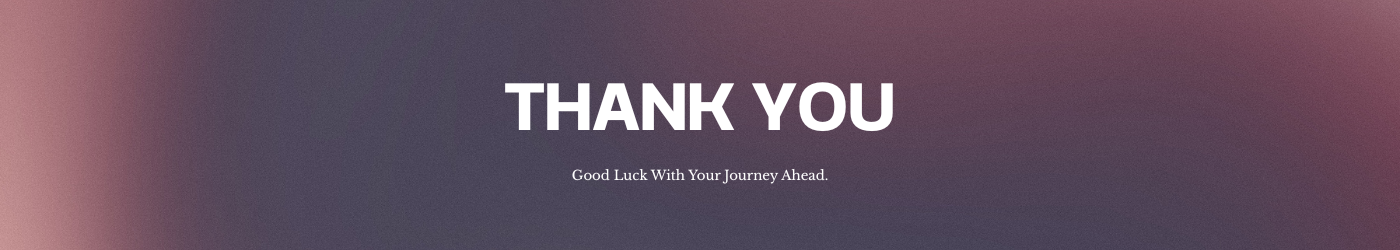